In [ ]:
# !pip install pandas
# !pip install scipy
# !pip install statsmodels
# !pip install matplotlib

#### –ü—Ä–æ—Ü–µ–¥—É—Ä–∞ –ö–æ—Ö—Ä–µ–π–Ω–∞-–û—Ä–∫–∞—Ç—Ç–∞

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS

In [ ]:
# from sklearn.linear_model import LinearRegression
# from scipy.stats import linregress

In [ ]:
data = pd.read_excel('–¥–∞–Ω–Ω—ã–µ_–∫_–æ.xlsx', header=None)

In [ ]:
model = OLS(data[0], sm.add_constant(data[1]))
results = model.fit()

In [ ]:
results.params

const    2.299319
1       -0.778862
dtype: float64

In [ ]:
y_pred = results.predict(sm.add_constant(data[1]))
residuals = data[0] - y_pred
residuals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0    -0.070536
1    -0.411170
2    -0.419477
3    -0.106477
4    -0.636959
5    -0.137057
6     0.065041
7    -0.021909
8     0.142601
9     0.031264
10    0.120978
11    0.180072
12   -0.004242
13    0.067078
14   -0.134426
15    0.051462
16    0.056474
17   -0.083366
18   -0.062118
19    0.277955
20    0.100117
21    0.572272
22    0.140334
23    0.282090
dtype: float64

In [ ]:
# dl = 1.27
# du = 1.45
# –ø–æ–ø–∞–ª–∏ –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª –æ—Ç 0 –¥–æ dl => –µ—Å—Ç—å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è
DW = durbin_watson(residuals)
DW

1.101759544151374

In [ ]:
# –î–∞–ª–µ–µ –ø—Ä–æ–≤–æ–¥–∏—Ç—Å—è –ø—Ä–æ—Ü–µ–¥—É—Ä–∞ –ö–æ—Ö—Ä–µ–π–Ω–∞-–û—Ä–∫–∞—Ç—Ç–∞, –Ω–∞—á–∏–Ω–∞—è —Å 0 –∏—Ç–µ—Ä–∞—Ü–∏–∏

In [ ]:
# –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Ä–æ
y = residuals[1:].reset_index(drop=True)
x = residuals[:-1].reset_index(drop=True)
model = OLS(y, x)
results = model.fit()
rho = results.params.values[0]
# –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
y_star = [data[0].values[i] - rho*data[0].values[i-1] for i in range(1, data[0].shape[0])]
x_star = [data[1].values[i] - rho*data[1].values[i-1] for i in range(1, data[1].shape[0])]

In [ ]:
# –æ—Ü–µ–Ω–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ alpha, beta
model = OLS(y_star, sm.add_constant(x_star))
results = model.fit()
alpha, beta = results.params
alpha = alpha/(1 - rho)
alpha, beta

(2.3908956788303826, -0.8293416993792969)

In [ ]:
# –Ω–æ–≤—ã–µ –æ—Å—Ç–∞—Ç–∫–∏
y_pred = alpha + beta*data[1]
residuals = data[0] - y_pred
residuals

0    -0.053176
1    -0.423341
2    -0.461482
3    -0.148482
4    -0.680680
5    -0.123230
6     0.083411
7    -0.027063
8     0.104230
9     0.023788
10    0.089826
11    0.174009
12    0.000952
13    0.082015
14   -0.163659
15    0.063572
16    0.043243
17   -0.073578
18   -0.061518
19    0.235395
20    0.116872
21    0.528955
22    0.141288
23    0.240641
dtype: float64

In [ ]:
# –æ—Ü–µ–Ω–∫–∏ –Ω–∞ –ø—Ä–æ—à–ª–æ–º —ç—Ç–∞–ø–µ (–¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Å –∑–∞–¥–∞–Ω–Ω–æ–π —Ç–æ—á–Ω–æ—Å—Ç—å—é eps)
eps = 0.05
old_alpha, old_beta, old_rho = alpha, beta, rho

In [ ]:
# –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Ä–æ
y = residuals[1:].reset_index(drop=True)
x = residuals[:-1].reset_index(drop=True)
model = OLS(y, x)
results = model.fit()
rho = results.params.values[0]
# –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
y_star = [data[0].values[i] - rho*data[0].values[i-1]
          for i in range(1, data[0].shape[0])]
x_star = [data[1].values[i] - rho*data[1].values[i-1]
          for i in range(1, data[1].shape[0])]

In [ ]:
# –æ—Ü–µ–Ω–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ alpha, beta
model = OLS(y_star, sm.add_constant(x_star))
results = model.fit()
alpha, beta = results.params
alpha = alpha/(1 - rho)
alpha, beta

(2.394317451664943, -0.8309537491878978)

In [ ]:
# –Ω–æ–≤—ã–µ –æ—Å—Ç–∞—Ç–∫–∏
y_pred = alpha + beta*data[1]
residuals = data[0] - y_pred
residuals

0    -0.053119
1    -0.424227
2    -0.463321
3    -0.150321
4    -0.682573
5    -0.123286
6     0.083500
7    -0.027725
8     0.102508
9     0.023051
10    0.088334
11    0.173318
12    0.000621
13    0.081995
14   -0.165090
15    0.063462
16    0.042323
17   -0.073762
18   -0.061996
19    0.233539
20    0.116909
21    0.527074
22    0.140821
23    0.238820
dtype: float64

In [ ]:
# 1 –∏ –ø–æ—Å–ª–µ–¥—É—é—â–∏–µ –∏—Ç–µ—Ä–∞—Ü–∏–∏, –ø–æ–∫–∞ –Ω–µ –≤—ã–ø–æ–ª–Ω–∏—Ç—Å—è –∫—Ä–∏—Ç–µ—Ä–∏–π –æ—Å—Ç–∞–Ω–æ–≤–∫–∏
while (old_alpha - alpha > eps) and (old_beta - beta > eps) and \
      (old_rho - rho > eps):
    old_alpha, old_beta, old_rho = alpha, beta, rho
    y = residuals[1:].reset_index(drop=True)
    x = residuals[:-1].reset_index(drop=True)
    model = OLS(y, x)
    results = model.fit()
    rho = results.params.values[0]
    # –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
    y_star = [data[0].values[i] - rho*data[0].values[i-1]
              for i in range(1, data[0].shape[0])]
    x_star = [data[1].values[i] - rho*data[1].values[i-1]
              for i in range(1, data[1].shape[0])]
    # –æ—Ü–µ–Ω–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ alpha, beta
    model = OLS(y_star, sm.add_constant(x_star))
    results = model.fit()
    alpha, beta = results.params
    alpha = alpha/(1 - rho)
    # –Ω–æ–≤—ã–µ –æ—Å—Ç–∞—Ç–∫–∏
    y_pred = alpha + beta*data[1]
    residuals = data[0] - y_pred

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     79.84
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.34e-08
Time:                        11:55:49   Log-Likelihood:                 2.0542
No. Observations:                  23   AIC:                           -0.1085
Df Residuals:                      21   BIC:                             2.163
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2756      0.089     14.348      0.0

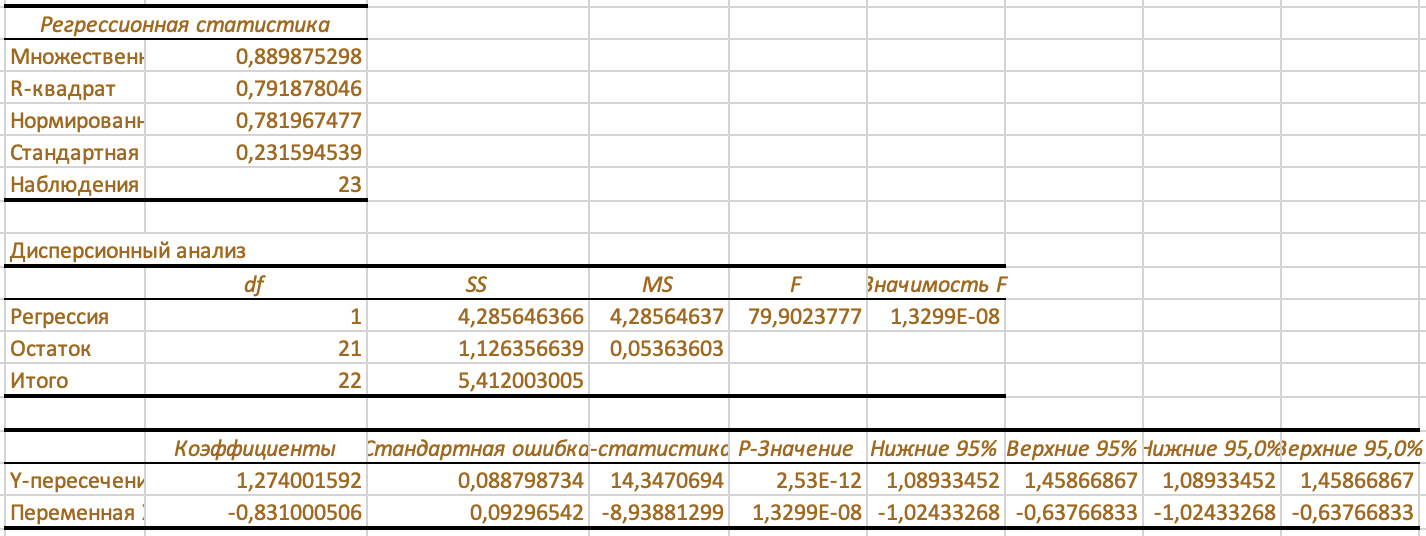

In [ ]:
alpha, beta, rho

(2.394317451664943, -0.8309537491878978, 0.4672310470535273)

In [ ]:
# => Yt = 2,394 - 0,831Xt + 0,468et
#         (0.089) (0.093)  ()

In [ ]:
# dl = 1.27
# du = 1.45
# –ø–æ–ø–∞–ª–∏ –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª –æ—Ç 0 –¥–æ dl => –µ—Å—Ç—å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è
model_start = OLS(data[0], sm.add_constant(data[1]))
results_start = model_start.fit()
y_pred_start = results_start.predict(sm.add_constant(data[1]).iloc[1:])
residuals_start = data.iloc[1:, 1] - y_pred_start
y_pred_new = alpha + beta*data.iloc[1:, 1] + rho*residuals_start
residuals_new = data[0][1:] - y_pred_new
DW = durbin_watson(residuals_new)
DW

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1.6800560767969166

In [ ]:
# DW = 1.6800560767969166 –ø–æ–ø–∞–¥–∞–µ—Ç –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª –æ—Ç du –¥–æ 4-du, => –Ω–µ—Ç –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏

#### –ò—Ä–∏–≤–∏–Ω –∏ –°—Ç—å—é–¥–µ–Ω—Ç –¥–ª—è –≤—ã—è–≤–ª–µ–Ω–∏—è –∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('–¥–∞–Ω–Ω—ã–µ_–∞–Ω–æ–º–∞–ª.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data

N       T    IR_M
1      1.0  1997 1  13.993
2      2.0       2  15.208
3      3.0       3  16.495
4      4.0       4  18.184
5      5.0       5  20.016
..     ...     ...     ...
296  296.0       8   618.2
297  297.0       9   614.1
298  298.0      10   624.2
299  299.0      11   622.5
300  300.0      12   630.6

[300 rows x 3 columns]

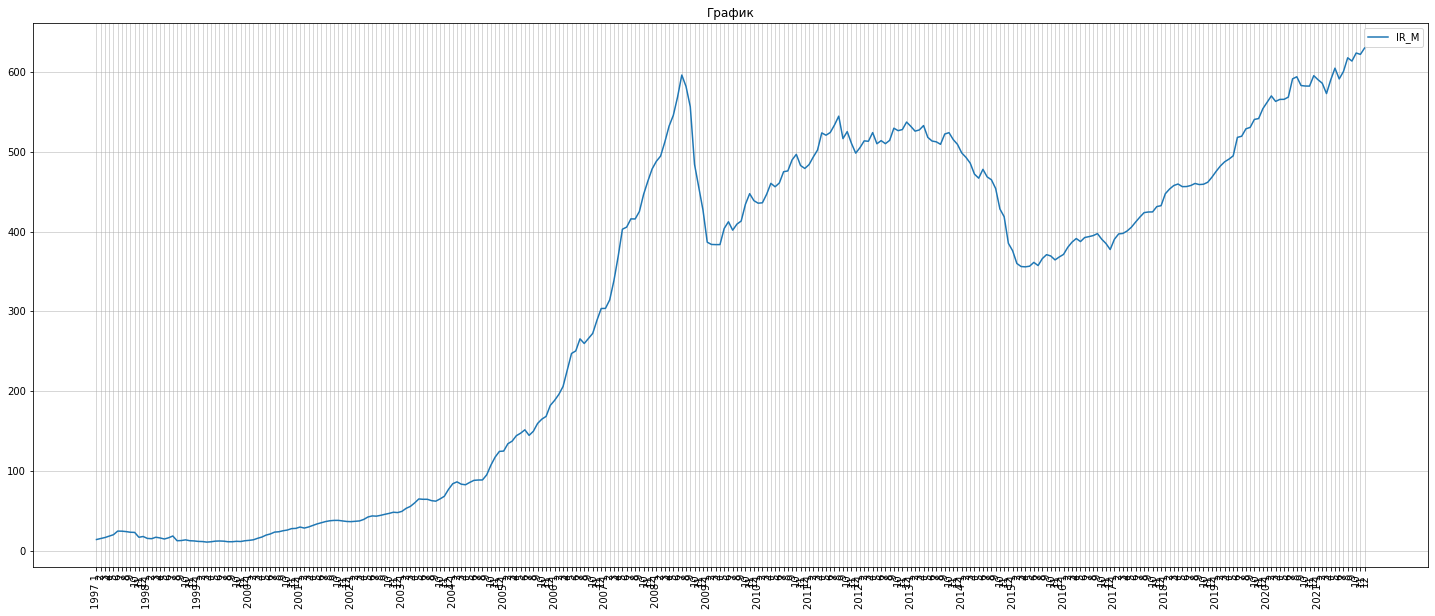

In [ ]:
ax = data.plot(y='IR_M',
               figsize=(25, 10), title='–ì—Ä–∞—Ñ–∏–∫',
               rot=30)
ax.grid(lw=0.5)
ax.set_xticks(data['N'])
ax.set_xticklabels(data['T'], rotation=90);

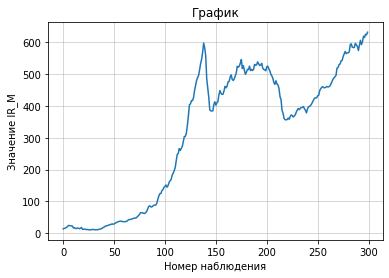

In [ ]:
plt.plot(data['IR_M'].values)
plt.grid(lw=0.5)
plt.xlabel("–ù–æ–º–µ—Ä –Ω–∞–±–ª—é–¥–µ–Ω–∏—è")
plt.ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ IR_M")
plt.title("–ì—Ä–∞—Ñ–∏–∫");

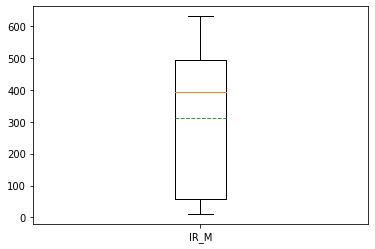

In [ ]:
plt.boxplot(data['IR_M'], showmeans=True, meanline=True, labels=['IR_M']);
# –æ—Ä–∞–Ω–∂–µ–≤–∞—è ‚Äì –º–µ–¥–∏–∞–Ω–∞
# –∑–µ–ª–µ–Ω–∞—è ‚Äì —Å—Ä–µ–¥–Ω–µ–µ
# –≤—ã–±—Ä–æ—Å–æ–≤ –Ω–µ—Ç

In [ ]:
# –ò—Ä–≤–∏–Ω
# –û—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏.
# –¢–∞–±–ª–∏—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫—Ä–∏—Ç–µ—Ä–∏—è –ò—Ä–≤–∏–Ω–∞ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω—ã –Ω–µ –¥–ª—è –≤—Å–µ—Ö –æ–±—ä–µ–º–æ–≤ –≤—ã–±–æ—Ä–∫–∏
# (–Ω–æ –µ—Å—Ç—å –º–µ—Ç–æ–¥—ã –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏). –ò—Ä–≤–∏–Ω —Å–º–æ—Ç—Ä–∏—Ç –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é —Å –ø—Ä–µ–¥—ã–¥—É—â–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º,
# –ø–æ—ç—Ç–æ–º—É –µ—Å–ª–∏ 2020 - –∞–Ω–æ–º–∞–ª–∏—è, —Ç–æ –æ–Ω ‚Äú–ø–æ—Ç—è–Ω–µ—Ç‚Äù –∞–Ω–æ–º–∞–ª—å–Ω–æ—Å—Ç—å –Ω–∞ 2021 –≥–æ–¥.
# –ò—Ä–≤–∏–Ω –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è —Å–µ–∑–æ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, —Ç–∞–∫ –∫–∞–∫ –∏–¥–µ—Ç –≤—ã—á–∏—Ç–∞–Ω–∏–µ –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ.

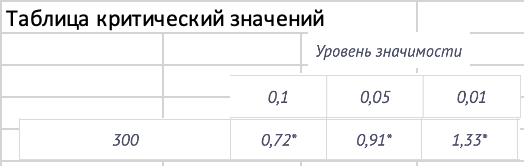

In [ ]:
Sy = data['IR_M'].std()
dif = (data['IR_M'][1:].reset_index(drop=True) - \
       data['IR_M'][:-1].reset_index(drop=True))
l_n = list(dif / Sy)
data['lambda_–Ω–∞–±–ª'] = [np.nan] + l_n
data['lambda_–∫—Ä–∏—Ç'] = [np.nan] + [0.9] * (data.shape[0] - 1)  # –∏–∑ —Ç–∞–±–ª–∏—Ü—ã –ø–æ n

In [ ]:
data['irvin'] = data['lambda_–Ω–∞–±–ª'] > data['lambda_–∫—Ä–∏—Ç']

In [ ]:
data['irvin'].sum()  # –ø–æ –ò—Ä–≤–∏–Ω—É –Ω–∞ —É—Ä –∑–Ω–∞—á 5% –Ω–µ—Ç –∞–Ω–æ–º–∞–ª –∑–Ω–∞—á

0

In [ ]:
# –°—Ç—å—é–¥–µ–Ω—Ç
# –õ—É—á—à–µ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å –≤—ã–±–æ—Ä–∫–æ–π –Ω–µ–±–æ–ª—å—à–æ–≥–æ –æ–±—ä–µ–º–∞ n ‚â§ 25. –ï—Å–ª–∏ –ø–æ–ø–∞–ª–æ –≤–æ –≤—Ç–æ—Ä—É—é –≥—Ä—É–ø–ø—É,
# –º–æ–∂–Ω–æ —Å–ª—É—á–∞–π–Ω–æ —Å–¥–µ–ª–∞—Ç—å
# –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω—ã–π –≤—ã–≤–æ–¥, —Ç—Ä–µ–±—É—é—Ç—Å—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Ç–µ—Å—Ç—ã. –ï—Å–ª–∏ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Å—Ç–∞–±–∏–ª—å–Ω—ã–π —Ä–æ—Å—Ç,
# —Ç–æ–≥–¥–∞ –Ω–∞—á–∞–ª—å–Ω—ã–µ –∏ –∫–æ–Ω–µ—á–Ω—ã–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è –±—É–¥—É—Ç –≤—ã–±–∏–≤–∞—Ç—å—Å—è, —Ç–∞–∫ –∫–∞–∫ –°—Ç—å—é–¥–µ–Ω—Ç —Å–º–æ—Ç—Ä–∏—Ç –Ω–∞ —Å–µ—Ä–µ–¥–∏–Ω—É
# —Ä—è–¥–∞. –ï—Å–ª–∏ 2020 –≥–æ–¥ - –∞–Ω–æ–º–∞–ª–∏—è, —Ç–æ –º–æ–∂–µ—Ç –ø–æ–∫–∞–∑–∞—Ç—å, —á—Ç–æ 2019 –≥–æ–¥ - —Ç–æ–∂–µ –∞–Ω–æ–º–∞–ª–∏—è.
# –°—Ç–æ–∏—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å, –∫–æ–≥–¥–∞ –∏–º–µ–µ–º –¥–µ–ª–æ —Å —Ä–æ–≤–Ω—ã–º, –Ω–µ–±—ã—Å—Ç—Ä–æ —Ä–∞—Å—Ç—É—â–∏–º —Ç—Ä–µ–Ω–¥–æ–º.

In [ ]:
from scipy.stats import t

In [ ]:
data = pd.read_excel('–¥–∞–Ω–Ω—ã–µ_–∞–Ω–æ–º–∞–ª.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data['tao'] = abs(data['IR_M'] - data['IR_M'].mean()) / data['IR_M'].std()

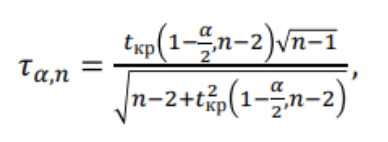

In [ ]:
n = data['IR_M'].shape[0]
def culc_crit(alpha, n):
    a = (t.isf(alpha/2, n-2) * np.sqrt(n-1))
    b = np.sqrt(n - 2 + t.isf(alpha/2, n-2)**2)
    return a/b

In [ ]:
data['crit5'] = culc_crit(0.05, n)
data['crit1'] = culc_crit(0.001, n)

In [ ]:
def get_group(crit5, crit1, tao):
    if tao <= crit5:
        # –Ω–µ –∞–Ω–æ–º–∞–ª
        return 0
    elif crit5 < tao <= crit1:
        # –º–æ–∂–µ—Ç –±—ã—Ç—å –∞–Ω–æ–º–∞–ª, –µ—Å–ª–∏ –µ—Å—Ç—å –∏ –¥—Ä—É–≥–∏–µ –ø–æ–≤–æ–¥—ã
        return 1
    else:
        # –∞–Ω–æ–º–∞–ª
        return 2
res = []
for i in data.index.values:
    res.append(get_group(data['crit5'][i], data['crit1'][i], data['tao'][i]))
data['group'] = res

In [ ]:
data['group'].value_counts()  # –ø–æ –º–µ—Ç–æ–¥—É –°—Ç—å—é–¥–µ–Ω—Ç–∞ –Ω–µ—Ç –∞–Ω–æ–º–∞–ª –Ω–∞–±–ª

0    300
Name: group, dtype: int64

#### –ó–∞—Ä–µ–º–±–∫–∏

In [ ]:
# –¢–µ—Å—Ç –ó–∞—Ä–µ–º–±–∫–∏ –ø—Ä–∏–º–µ–Ω–∏–º –¥–ª—è –≤—ã–±–æ—Ä–∞ –∏–∑ –¥–≤—É—Ö —Ñ–æ—Ä–º –º–æ–¥–µ–ª–µ–π (–Ω–µ—Å—Ä–∞–≤–Ω–∏–º—ã—Ö –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ),
# –≤ –æ–¥–Ω–æ–π –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –∑–∞–≤–∏—Å–∏–º–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –≤—Ö–æ–¥–∏—Ç —Å –ª–æ–≥–∞—Ä–∏—Ñ–º–æ–º, –∞ –≤ –¥—Ä—É–≥–æ–π ‚Äì –Ω–µ—Ç.
# –ú–µ—Ç–æ–¥ –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ—Ü–µ–Ω–∏—Ç—å –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –Ω–∞–±–ª—é–¥–∞–µ–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π. –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è, —á—Ç–æ yi > 0 –¥–ª—è –ª—é–±–æ–≥–æ i
# –ù–µ –Ω—É–∂–Ω–æ –ø—Ä–∏–º–µ–Ω—è—Ç—å –¥–∞–Ω–Ω—ã–π –º–µ—Ç–æ–¥ –¥–ª—è —É—Ä–∞–≤–Ω–µ–Ω–∏–π –æ–¥–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–π —Ñ–æ—Ä–º—ã,
# –∞ —Ç–∞–∫ –∂–µ –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–µ–∂–¥—É —Å–æ–±–æ–π –∏–Ω—ã—Ö —Ñ–æ—Ä–º, –∫—Ä–æ–º–µ –ª–∏–Ω–µ–π–Ω–æ–π –∏ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π
# (–¥–≤–æ–π–Ω–∞—è-–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è; –ª–∏–Ω–µ–π–Ω–æ-–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è; –æ–±—Ä–∞—Ç–Ω–∞—è).

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('–¥–∞–Ω–Ω—ã–µ_—Ç–µ—Å—Ç—ã.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data

T      t WAG_M Y
1    1993 1    1.0     100
2         2    2.0   99.04
3         3    3.0  101.77
4         4    4.0  110.05
5         5    5.0  115.47
..      ...    ...     ...
343       7  343.0   280.4
344       8  344.0     265
345       9  345.0   274.8
346      10  346.0     271
347      11  347.0   272.9

[347 rows x 3 columns]

In [ ]:
from scipy.stats.mstats import gmean

In [ ]:
gm = gmean(data['WAG_M Y'].to_list())  # —Å—Ä–µ–¥–Ω–µ–µ –≥–µ–æ–º–µ—Ç—Ä–∏—á–µ—Å–∫–æ–µ

In [ ]:
data['Ystar'] = data['WAG_M Y']/gm
data['LN_Ystar'] = np.log(data['Ystar'].to_list())

In [ ]:
data

T      t WAG_M Y     Ystar  LN_Ystar
1    1993 1    1.0     100  0.672847 -0.396237
2         2    2.0   99.04  0.666388 -0.405884
3         3    3.0  101.77  0.684756 -0.378692
4         4    4.0  110.05  0.740468 -0.300473
5         5    5.0  115.47  0.776937 -0.252397
..      ...    ...     ...       ...       ...
343       7  343.0   280.4  1.886663  0.634810
344       8  344.0     265  1.783045  0.578322
345       9  345.0   274.8  1.848984  0.614636
346      10  346.0     271  1.823416  0.600711
347      11  347.0   272.9    1.8362  0.607698

[347 rows x 5 columns]

In [ ]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
# ESS1
x = sm.add_constant(data['t']).values
y = data['Ystar'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
ESS1 = sum((y - results.predict(x).reshape(-1, 1))**2)[0]
# ESS2
x = sm.add_constant(data['t']).values
y = data['LN_Ystar'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
ESS2 = sum((y - results.predict(x).reshape(-1, 1))**2)[0]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
n = data.shape[0]
z_stat = abs(n/2 * np.log(ESS1/ ESS2))
z_stat

41.85934989078163

In [ ]:
from scipy.stats import chi2
chi2_crit = chi2.isf(0.05, 1)
chi2_crit

3.8414588206941285

In [ ]:
# Z–Ω–∞–±–ª > Chi-2—Ç–∞–±–ª, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ,
# –≥–∏–ø–æ—Ç–µ–∑–∞ –æ–± –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏—è—Ö –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è,
# –≤—ã–±–∏—Ä–∞–µ–º –º–æ–¥–µ–ª—å –ø–æ–ª—É–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫—É—é

#### –ë–æ–∫—Å–∞-–ö–æ–∫—Å–∞

In [ ]:
# –í —Ç–µ—Å—Ç–µ –ë–æ–∫—Å–∞-–ö–æ–∫—Å–∞ –ø—Ä–µ–¥–ø–æ–ª–∞–Ω–∞–µ—Ç—Å—è, —á—Ç–æ yi > 0 –¥–ª—è –ª—é–±–æ–≥–æ i. –¢–µ—Å—Ç –ë–æ–∫—Å–∞-–ö–æ–∫—Å–∞ –æ—Å–Ω–æ–≤—ã–≤–∞–µ—Ç—Å—è
# –Ω–∞ —É—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏–∏ –æ —Ç–æ–º, —á—Ç–æ (—É-1) –∏ logy —è–≤–ª—è—é—Ç—Å—è —á–∞—Å—Ç–Ω—ã–º–∏ —Å–ª—É—á–∞—è–º–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –≤–∏–¥–∞
# F = (y^lamda - 1) / lambda
# –ü–∞—Ä–∞–º–µ—Ç—Ä lambda –º–æ–∂–Ω–æ –≤—ã–±–∏—Ä–∞—Ç—å, –º–∞–∫—Å–∏–º–∏–∑–∏—Ä—É—è –ª–æ–≥–∞—Ä–∏—Ñ–º –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è. –ï—â–µ –æ–¥–∏–Ω —Å–ø–æ—Å–æ–±
# –ø–æ–∏—Å–∫–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –æ—Å–Ω–æ–≤–∞–Ω –Ω–∞ –ø–æ–∏—Å–∫–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞
# –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –∫–≤–∞–Ω—Ç–∏–ª—è–º–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω–æ–π
# –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('–¥–∞–Ω–Ω—ã–µ_—Ç–µ—Å—Ç—ã.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data

T      t WAG_M Y
1    1993 1    1.0     100
2         2    2.0   99.04
3         3    3.0  101.77
4         4    4.0  110.05
5         5    5.0  115.47
..      ...    ...     ...
343       7  343.0   280.4
344       8  344.0     265
345       9  345.0   274.8
346      10  346.0     271
347      11  347.0   272.9

[347 rows x 3 columns]

In [ ]:
from scipy.stats.mstats import gmean

In [ ]:
gm = gmean(data['WAG_M Y'].to_list())  # —Å—Ä–µ–¥–Ω–µ–µ –≥–µ–æ–º–µ—Ç—Ä–∏—á–µ—Å–∫–æ–µ

In [ ]:
data['Ystar'] = data['WAG_M Y']/gm

In [ ]:
data

T      t WAG_M Y     Ystar
1    1993 1    1.0     100  0.672847
2         2    2.0   99.04  0.666388
3         3    3.0  101.77  0.684756
4         4    4.0  110.05  0.740468
5         5    5.0  115.47  0.776937
..      ...    ...     ...       ...
343       7  343.0   280.4  1.886663
344       8  344.0     265  1.783045
345       9  345.0   274.8  1.848984
346      10  346.0     271  1.823416
347      11  347.0   272.9    1.8362

[347 rows x 4 columns]

In [ ]:
# –í–≤–æ–¥–∏—Ç—Å—è –Ω–æ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è lambda
# (lambda=1 –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ –æ–±—ã—á–Ω–æ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ñ–æ—Ä–º–µ, lambda->0 –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ –ª–æ–≥–æ—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π)

In [ ]:
def get_res_test(list_lambda, data, min_ESS=10**5, min_i=10**5):
    dt = data.copy()
    min_res = {'model': None,
               'results': None,
               'ESS': None,
               'lambda': None}
    for i in range(len(list_lambda)):
        dt[f'new_Y{i}'] = (dt['Ystar']**list_lambda[i]) / list_lambda[i]
        dt[f'new_X{i}'] = (dt['t']**list_lambda[i]) / list_lambda[i]
        x = sm.add_constant(dt[f'new_X{i}']).values
        y = dt[f'new_Y{i}'].values.reshape(-1, 1)
        model = OLS(y, x)
        results = model.fit()
        ESS = sum((y - results.predict(x).reshape(-1, 1))**2)[0]
        if min_res['ESS'] is None or min_res['ESS'] > ESS:
            min_res['ESS'] = ESS
            min_res['model'] = model
            min_res['results'] = results
            min_res['lambda'] = list_lambda[i]
    return min_res

In [ ]:
get_res_test([0.1, 0.5, 0.9], data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


{'ESS': 13.014043287523673,
 'lambda': 0.9,
 'model': <statsmodels.regression.linear_model.OLS at 0x7f0215051f50>,
 'results': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f02150517d0>}

In [ ]:
# –î–∞–ª–µ–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –æ–∫—Ä–µ—Å—Ç–Ω–æ—Å—Ç—å Lambda=0,9. –í—ã–±–æ—Ä –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è
# Lambda ‚Äì —ç—Ç–æ –∑–∞–¥–∞—á–∞ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏. –û–¥–Ω–∞–∫–æ Lambda -> 1, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ,
# —Ñ—É–Ω–∫—Ü–∏—è –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –ª–∏–Ω–µ–π–Ω—ã–π –≤–∏–¥

#### –ê–∫–∞–∏–∫–µ

In [ ]:
# –ö—Ä–∏—Ç–µ—Ä–∏–π —Å–≤—è–∑–∞–Ω —Å –ø–æ–Ω—è—Ç–∏–µ–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –ö—É–ª—å–±–∞–∫–∞ ‚Äî –õ–µ–π–±–ª–µ—Ä–∞ (Kullback‚ÄìLeibler),
# –ø—Ä–∏ –ø–æ–º–æ—â–∏ –∫–æ—Ç–æ—Ä–æ–≥–æ –º–æ–∂–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É –º–æ–¥–µ–ª—è–º–∏.
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –∫—Ä–∏—Ç–µ—Ä–∏—è —è–≤–ª—è–µ—Ç—Å—è —Ç—Ä—É–¥–æ–µ–º–∫–æ–π –æ–ø–µ—Ä–∞—Ü–∏–µ–π. –ü–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –º–æ–¥–µ–ª–µ–π —Å –æ–¥–∏–Ω–∞–∫–æ–≤–æ–π –∑–∞–≤–∏—Å–∏–º–æ–π
# –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –ù–µ–ª—å–∑—è –ø—Ä–∏–º–µ–Ω—è—Ç—å –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è y –∏ ln(y)

In [ ]:
# –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π —Å —Ä–∞–∑–Ω—ã–º —á–∏—Å–ª–æ–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤,
# –∫–æ–≥–¥–∞ —Ç—Ä–µ–±—É–µ—Ç—Å—è –≤—ã–±—Ä–∞—Ç—å –Ω–∞–∏–ª—É—á—à–∏–π –Ω–∞–±–æ—Ä –æ–±—ä—è—Å–Ω—è—é—â–∏—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö.
# –î–∞–Ω–Ω—ã–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏ —É—á–∏—Ç—ã–≤–∞—é—Ç —á–∏—Å–ª–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π n –∏ —á–∏—Å–ª–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏ p –∏ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è
# –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞ –≤–∏–¥–æ–º ¬´—Ñ—É–Ω–∫—Ü–∏–∏ —à—Ç—Ä–∞—Ñ–∞¬ª –∑–∞ —á–∏—Å–ª–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤. –í—Å–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—é—Ç—Å—è –Ω–∞
# –æ—Å–Ω–æ–≤–µ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ —Ñ—É–Ω–∫—Ü–∏–∏ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è LogL, —á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø—Ä–∏–º–µ–Ω—è—Ç—å –∏—Ö –∫ —à–∏—Ä–æ–∫–æ–º—É —Å–ø–µ–∫—Ç—Ä—É
# –º–æ–¥–µ–ª–µ–π. –î–ª—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –¥–µ–π—Å—Ç–≤—É–µ—Ç –ø—Ä–∞–≤–∏–ª–æ: –Ω–∞–∏–ª—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏–º–µ–µ—Ç –Ω–∞–∏–º–µ–Ω—å—à–µ–µ
# –∑–Ω–∞—á–µ–Ω–∏–µ –∫—Ä–∏—Ç–µ—Ä–∏—è.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('–¥–∞–Ω–Ω—ã–µ_—Ç–µ—Å—Ç—ã.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data

T      t WAG_M Y
1    1993 1    1.0     100
2         2    2.0   99.04
3         3    3.0  101.77
4         4    4.0  110.05
5         5    5.0  115.47
..      ...    ...     ...
343       7  343.0   280.4
344       8  344.0     265
345       9  345.0   274.8
346      10  346.0     271
347      11  347.0   272.9

[347 rows x 3 columns]

In [ ]:
def get_AIC(x, y, n, k):
    """
    n - –¥–ª–∏–Ω–∞ –≤—ã–±–æ—Ä–∫–∏
    k ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä–æ–≤
    """
    model = OLS(y, x)
    results = model.fit()
    ESS = sum((y - results.predict(x).reshape(-1, 1))**2)[0]
    print(f'ESS = {ESS}')
    AIC = np.log(ESS/n) + 2*k/n + 1 + np.log(2*np.pi)
    return AIC

In [ ]:
x = sm.add_constant(data['t']).values
y = data['WAG_M Y'].values.reshape(-1, 1)
AIC1 = get_AIC(x, y, n=data.shape[0], k=1)

ESS = 269344.5904199037


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x = sm.add_constant(data['t']).values
y = np.log(data['WAG_M Y'].to_list()).reshape(-1, 1)
AIC2 = get_AIC(x, y, n=data.shape[0], k=1)

ESS = 15.521037185387671


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
AIC1

9.498062819298486

In [ ]:
AIC2

-0.26348768329919814

In [ ]:
# –ü—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏–µ –æ—Ç–¥–∞–µ—Ç—Å—è –º–æ–¥–µ–ª–∏ —Å –Ω–∞–∏–º–µ–Ω—å—à–∏–º AIC, —Ç–æ –µ—Å—Ç—å –ø–æ–ª—É–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π
# –ù–û –≠–¢–û–¢ –ö–†–ò–¢–ï–†–ò–ô –ù–ï –ò–°–ü–û–õ–¨–ó–£–Æ–¢ –î–õ–Ø –≠–¢–û–ì–û

#### –®–≤–∞—Ä—Ü

In [ ]:
# –ï—Å–ª–∏ –≤–∞–∂–Ω–∞ –ø—Ä–æ—Å—Ç–æ—Ç–∞ –º–æ–¥–µ–ª–∏, —Ç–æ —á–∞—â–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç —ç—Ç–æ—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ê–∫–∞–∏–∫–µ.
# –ü–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –º–æ–¥–µ–ª–µ–π —Å –æ–¥–∏–Ω–∞–∫–æ–≤–æ–π –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –ù–µ–ª—å–∑—è –ø—Ä–∏–º–µ–Ω—è—Ç—å –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è y –∏ ln(y)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('–¥–∞–Ω–Ω—ã–µ_—Ç–µ—Å—Ç—ã.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data

T      t WAG_M Y
1    1993 1    1.0     100
2         2    2.0   99.04
3         3    3.0  101.77
4         4    4.0  110.05
5         5    5.0  115.47
..      ...    ...     ...
343       7  343.0   280.4
344       8  344.0     265
345       9  345.0   274.8
346      10  346.0     271
347      11  347.0   272.9

[347 rows x 3 columns]

In [ ]:
def get_SC(x, y, n, k):
    """
    n - –¥–ª–∏–Ω–∞ –≤—ã–±–æ—Ä–∫–∏
    k ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä–æ–≤
    """
    model = OLS(y, x)
    results = model.fit()
    ESS = sum((y - results.predict(x).reshape(-1, 1))**2)[0]
    print(f'ESS = {ESS}')
    SC = np.log(ESS/n) + k*np.log(n)/n + 1 + np.log(2*np.pi)
    return SC

In [ ]:
x = sm.add_constant(data['t']).values
y = data['WAG_M Y'].values.reshape(-1, 1)
SC1 = get_SC(x, y, n=data.shape[0], k=1)

ESS = 269344.5904199037


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x = sm.add_constant(data['t']).values
y = np.log(data['WAG_M Y'].to_list()).reshape(-1, 1)
SC2 = get_SC(x, y, n=data.shape[0], k=1)

ESS = 15.521037185387671


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
SC1

9.509155974283924

In [ ]:
SC2

-0.2523945283137605

In [ ]:
# –ü—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏–µ –æ—Ç–¥–∞–µ—Ç—Å—è –º–æ–¥–µ–ª–∏ —Å –Ω–∞–∏–º–µ–Ω—å—à–∏–º SC, —Ç–æ –µ—Å—Ç—å –ø–æ–ª—É–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π
# –ù–û –≠–¢–û–¢ –ö–†–ò–¢–ï–†–ò–ô –ù–ï –ò–°–ü–û–õ–¨–ó–£–Æ–¢ –î–õ–Ø –≠–¢–û–ì–û

#### –ë–µ—Ä–∞ –∏ –ú–∞–∫–ê–ª–µ—Ä–∞

In [ ]:
# –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è, —á—Ç–æ yi > 0 –¥–ª—è –ª—é–±–æ–≥–æ i. –ê —Ç–∞–∫–∂–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ  y^ > 0

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('–¥–∞–Ω–Ω—ã–µ_—Ç–µ—Å—Ç—ã.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data['LN Y'] = np.log(data['WAG_M Y'].to_list())

In [ ]:
data

T      t WAG_M Y      LN Y
1    1993 1    1.0     100  4.605170
2         2    2.0   99.04  4.595524
3         3    3.0  101.77  4.622715
4         4    4.0  110.05  4.700935
5         5    5.0  115.47  4.749011
..      ...    ...     ...       ...
343       7  343.0   280.4  5.636217
344       8  344.0     265  5.579730
345       9  345.0   274.8  5.616044
346      10  346.0     271  5.602119
347      11  347.0   272.9  5.609105

[347 rows x 4 columns]

In [ ]:
# —ç—Ç–∞–ø 1
x = sm.add_constant(data['t']).values
y = data['WAG_M Y'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
data['Yhat'] = results.predict(x)

x = sm.add_constant(data['t']).values
y = data['LN Y'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
data['LNYhat'] = results.predict(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# —ç—Ç–∞–ø 2
data['exp(LNYhat)'] = np.exp(data['LNYhat'].to_list())
data['LN(Yhat)'] = np.log(data['Yhat'].to_list())

In [ ]:
data

T      t WAG_M Y      LN Y        Yhat    LNYhat  exp(LNYhat)  \
1    1993 1    1.0     100  4.605170   43.748457  4.198151    66.563140   
2         2    2.0   99.04  4.595524   44.465177  4.202794    66.872918   
3         3    3.0  101.77  4.622715   45.181896  4.207437    67.184137   
4         4    4.0  110.05  4.700935   45.898616  4.212080    67.496805   
5         5    5.0  115.47  4.749011   46.615336  4.216723    67.810929   
..      ...    ...     ...       ...         ...       ...          ...   
343       7  343.0   280.4  5.636217  288.866624  5.786091   325.737355   
344       8  344.0     265  5.579730  289.583344  5.790734   327.253303   
345       9  345.0   274.8  5.616044  290.300063  5.795378   328.776306   
346      10  346.0     271  5.602119  291.016783  5.800021   330.306397   
347      11  347.0   272.9  5.609105  291.733503  5.804664   331.843609   

     LN(Yhat)  
1    3.778456  
2    3.794706  
3    3.810696  
4    3.826435  
5    3.841930  
..        ...  
343  5.665965  
344  5.668443  
345  5.670915  
346  5.673381  
347  5.675841  

[347 rows x 8 columns]

In [ ]:
x = sm.add_constant(data['t']).values
y = data['exp(LNYhat)'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
v1_exp = y - results.predict(x).reshape(-1, 1)

x = sm.add_constant(data['t']).values
y = data['LN(Yhat)'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
v2_ln = y - results.predict(x).reshape(-1, 1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
data['v1_exp'] = v1_exp
data['v2_ln'] = v2_ln

In [ ]:
# —ç—Ç–∞–ø 3
x = sm.add_constant(data[['t', 'v1_exp']]).values
y = data['LN Y'].values.reshape(-1, 1)
model_lny = OLS(y, x)
results_lny = model_lny.fit()

x = sm.add_constant(data[['t', 'v2_ln']]).values
y = data['WAG_M Y'].values.reshape(-1, 1).astype('float64')
model_y = OLS(y, x)
results_y = model_y.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(results_lny.summary())  # —Ç–µ—Ç–∞1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     834.6
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.04e-132
Time:                        17:03:55   Log-Likelihood:                 47.197
No. Observations:                 347   AIC:                            -88.39
Df Residuals:                     344   BIC:                            -76.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1935      0.023    183.736      0.0

In [ ]:
print(results_y.summary())  # —Ç–µ—Ç–∞2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1520.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.68e-171
Time:                        17:03:56   Log-Likelihood:                -1603.1
No. Observations:                 347   AIC:                             3212.
Df Residuals:                     344   BIC:                             3224.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.0317      2.653     16.218      0.0

In [ ]:
teta1 = results_lny.params[-1]
teta2 = results_y.params[-1]

In [ ]:
from scipy.stats import t
t_crit = t.isf(0.05/2, 344)  # –∏–∑ –≤—ã–≤–æ–¥–∞ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
t_crit

1.9668840363000124

In [ ]:
# –ò–∑ –≤—ã–≤–æ–¥–∞ —Ä–µ–≥—Ä–µ—Å—Å–∏–π: –ø—Ä–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –Ω–∞–±–ª—é–¥–∞–µ–º–æ–π —Å –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º, –≤–∏–¥–Ω–æ,
# —á—Ç–æ –∫–æ—ç—Ñ—Ñ teta1 ‚Äì –Ω–µ–∑–Ω–∞—á, teta2 ‚Äì –∑–Ω–∞—á

In [ ]:
# –ï—Å–ª–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —Ç–µ—Ç–∞1 –Ω–µ–∑–Ω–∞—á–∏–º, —Ç–æ –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è –ø–æ–ª—É–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è –º–æ–¥–µ–ª—å.
# –ï—Å–ª–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —Ç–µ—Ç–∞2 –Ω–µ–∑–Ω–∞—á–∏–º, —Ç–æ –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è –ª–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å.
# –í —Å–ª—É—á–∞–µ –µ—Å–ª–∏ –æ–±–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ –∑–Ω–∞—á–∏–º—ã –∏–ª–∏ –Ω–µ–∑–Ω–∞—á–∏–º—ã,
# –º—ã –Ω–µ –º–æ–∂–µ–º –≤—ã–±—Ä–∞—Ç—å –æ–¥–Ω—É –∏–∑ –º–æ–¥–µ–ª–µ–π.

#### –ú–∞–∫–ö–∏–Ω–Ω–æ–Ω, –£–∞–π—Ç, –î—ç–≤–∏–¥—Å–æ–Ω

In [ ]:
# –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è, —á—Ç–æ yi > 0 –¥–ª—è –ª—é–±–æ–≥–æ i. –ê —Ç–∞–∫–∂–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ  y^ > 0

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('–¥–∞–Ω–Ω—ã–µ_—Ç–µ—Å—Ç—ã.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data['LN Y'] = np.log(data['WAG_M Y'].to_list())

In [ ]:
data

T      t WAG_M Y      LN Y
1    1993 1    1.0     100  4.605170
2         2    2.0   99.04  4.595524
3         3    3.0  101.77  4.622715
4         4    4.0  110.05  4.700935
5         5    5.0  115.47  4.749011
..      ...    ...     ...       ...
343       7  343.0   280.4  5.636217
344       8  344.0     265  5.579730
345       9  345.0   274.8  5.616044
346      10  346.0     271  5.602119
347      11  347.0   272.9  5.609105

[347 rows x 4 columns]

In [ ]:
# —ç—Ç–∞–ø 1
x = sm.add_constant(data['t']).values
y = data['WAG_M Y'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
data['Yhat'] = results.predict(x)

x = sm.add_constant(data['t']).values
y = data['LN Y'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
data['LNYhat'] = results.predict(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
data.head(1)

T    t WAG_M Y     LN Y       Yhat    LNYhat
1  1993 1  1.0     100  4.60517  43.748457  4.198151

In [ ]:
# –ï—Å–ª–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ–∂–¥—É –ª–∏–Ω–µ–π–Ω–æ–π –∏ –ø–æ–ª—É–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π

In [ ]:
data['Yhat-exp(lnyhat)'] = data['Yhat'] - np.exp(data['LNYhat'].to_list())
data['lnYhat-lnyhat'] = np.log(data['Yhat'].to_list()) - data['LNYhat']

In [ ]:
# —ç—Ç–∞–ø 2
x = sm.add_constant(data[['t', 'Yhat-exp(lnyhat)']]).values.astype('float64')
y = data['LN Y'].values.reshape(-1, 1).astype('float64')
model_lny = OLS(y, x)
results_lny = model_lny.fit()

x = sm.add_constant(data[['t', 'lnYhat-lnyhat']]).values.astype('float64')
y = data['WAG_M Y'].values.reshape(-1, 1).astype('float64')
model_y = OLS(y, x)
results_y = model_y.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(results_lny.summary())  # gamma1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     834.6
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.04e-132
Time:                        17:33:12   Log-Likelihood:                 47.197
No. Observations:                 347   AIC:                            -88.39
Df Residuals:                     344   BIC:                            -76.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1892      0.023    180.251      0.0

In [ ]:
print(results_y.summary())  # gamma2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1520.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.68e-171
Time:                        17:33:14   Log-Likelihood:                -1603.1
No. Observations:                 347   AIC:                             3212.
Df Residuals:                     344   BIC:                             3224.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.7763      2.688     14.428      0.0

In [ ]:
gamma1 = results_lny.params[-1]
gamma2 = results_y.params[-1]

In [ ]:
from scipy.stats import t
t_crit = t.isf(0.05/2, 344)  # –∏–∑ –≤—ã–≤–æ–¥–∞ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
t_crit

1.9668840363000124

In [ ]:
# –ò–∑ –≤—ã–≤–æ–¥–∞ —Ä–µ–≥—Ä–µ—Å—Å–∏–π: –ø—Ä–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –Ω–∞–±–ª—é–¥–∞–µ–º–æ–π —Å –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º, –≤–∏–¥–Ω–æ,
# —á—Ç–æ –∫–æ—ç—Ñ—Ñ gamma1 ‚Äì –Ω–µ–∑–Ω–∞—á, gamma2 ‚Äì –∑–Ω–∞—á

In [ ]:
# –ï—Å–ª–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç gamma1 –Ω–µ–∑–Ω–∞—á–∏–º, —Ç–æ –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è –ø–æ–ª—É–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è –º–æ–¥–µ–ª—å.
# –ï—Å–ª–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç gamma2 –Ω–µ–∑–Ω–∞—á–∏–º, —Ç–æ –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è –ª–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å.
# –í —Å–ª—É—á–∞–µ –µ—Å–ª–∏ –æ–±–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ –∑–Ω–∞—á–∏–º—ã –∏–ª–∏ –Ω–µ–∑–Ω–∞—á–∏–º—ã,
# –º—ã –Ω–µ –º–æ–∂–µ–º –≤—ã–±—Ä–∞—Ç—å –æ–¥–Ω—É –∏–∑ –º–æ–¥–µ–ª–µ–π.

In [ ]:
# –ï—Å–ª–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ–∂–¥—É –ª–∏–Ω–µ–π–Ω–æ–π –∏ –ª–∏–Ω–µ–π–Ω–æ–π –≤ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞—Ö

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('–¥–∞–Ω–Ω—ã–µ_—Ç–µ—Å—Ç—ã.xlsx', header=0)

In [ ]:
data.drop(index=0, inplace=True)

In [ ]:
data['LN Y'] = np.log(data['WAG_M Y'].to_list())

In [ ]:
data['Ln t'] = np.log(data['t'].to_list())

In [ ]:
# —ç—Ç–∞–ø 1
x = sm.add_constant(data['t']).values
y = data['WAG_M Y'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
data['Yhat'] = results.predict(x)

x = sm.add_constant(data['Ln t']).values
y = data['LN Y'].values.reshape(-1, 1)
model = OLS(y, x)
results = model.fit()
data['LNYhat'] = results.predict(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
data.head(1)

T    t WAG_M Y     LN Y  Ln t       Yhat    LNYhat
1  1993 1  1.0     100  4.60517   0.0  43.748457  3.156874

In [ ]:
# –ï—Å–ª–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ–∂–¥—É –ª–∏–Ω–µ–π–Ω–æ–π –∏ –ø–æ–ª—É–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π

In [ ]:
data['Yhat-exp(lnyhat)'] = data['Yhat'] - np.exp(data['LNYhat'].to_list())
data['lnYhat-lnyhat'] = np.log(data['Yhat'].to_list()) - data['LNYhat']

In [ ]:
# —ç—Ç–∞–ø 2
x = sm.add_constant(data[['Ln t', 'Yhat-exp(lnyhat)']]).values.astype('float64')
y = data['LN Y'].values.reshape(-1, 1).astype('float64')
model_lny = OLS(y, x)
results_lny = model_lny.fit()

x = sm.add_constant(data[['t', 'lnYhat-lnyhat']]).values.astype('float64')
y = data['WAG_M Y'].values.reshape(-1, 1).astype('float64')
model_y = OLS(y, x)
results_y = model_y.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(results_lny.summary())  # delta1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     931.6
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.41e-139
Time:                        17:36:50   Log-Likelihood:                 63.152
No. Observations:                 347   AIC:                            -120.3
Df Residuals:                     344   BIC:                            -108.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2720      0.069     61.517      0.0

In [ ]:
print(results_y.summary())  # delta2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1497.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.83e-170
Time:                        17:37:02   Log-Likelihood:                -1605.5
No. Observations:                 347   AIC:                             3217.
Df Residuals:                     344   BIC:                             3228.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.1703      5.215     16.525      0.0

In [ ]:
delta1 = results_lny.params[-1]
delta2 = results_y.params[-1]

In [ ]:
from scipy.stats import t
t_crit = t.isf(0.05/2, 344)  # –∏–∑ –≤—ã–≤–æ–¥–∞ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
t_crit

1.9668840363000124

In [ ]:
# –ò–∑ –≤—ã–≤–æ–¥–∞ —Ä–µ–≥—Ä–µ—Å—Å–∏–π: –ø—Ä–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –Ω–∞–±–ª—é–¥–∞–µ–º–æ–π —Å –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º, –≤–∏–¥–Ω–æ,
# —á—Ç–æ –∫–æ—ç—Ñ—Ñ delta1 ‚Äì –∑–Ω–∞—á, delta2 ‚Äì –∑–Ω–∞—á

In [ ]:
# –ï—Å–ª–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç delta1 –Ω–µ–∑–Ω–∞—á–∏–º, —Ç–æ –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è –ª–∏–Ω–µ–π–Ω–∞—è –≤ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞—Ö –º–æ–¥–µ–ª—å.
# –ï—Å–ª–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç delta2 –Ω–µ–∑–Ω–∞—á–∏–º, —Ç–æ –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è –ª–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å.
# –í —Å–ª—É—á–∞–µ –µ—Å–ª–∏ –æ–±–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ –∑–Ω–∞—á–∏–º—ã –∏–ª–∏ –Ω–µ–∑–Ω–∞—á–∏–º—ã,
# –º—ã –Ω–µ –º–æ–∂–µ–º –≤—ã–±—Ä–∞—Ç—å –æ–¥–Ω—É –∏–∑ –º–æ–¥–µ–ª–µ–π.

#### –•–æ–ª—å—Ç

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.regression.linear_model import OLS
from scipy.stats import t
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt

In [ ]:
data = pd.read_excel('123.xlsx', sheet_name='2')
data.head()

T   WAG_M
0  1993 1  100.00
1       2   99.04
2       3  101.77
3       4  110.05
4       5  115.47

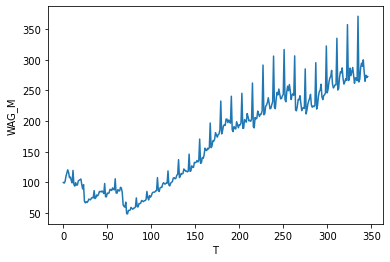

In [ ]:
plt.plot(data.WAG_M.values)
plt.xlabel('T')
plt.ylabel('WAG_M')
plt.show()

In [ ]:
data['t'] = [x for x in range(1, len(data)+1)]
data.head()

T   WAG_M  t
0  1993 1  100.00  1
1       2   99.04  2
2       3  101.77  3
3       4  110.05  4
4       5  115.47  5

In [ ]:
T_preds = 4 # –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å –Ω–∞ 4 –ø–µ—Ä–∏–æ–¥–∞ –≤–ø–µ—Ä—ë–¥

In [ ]:
y = data.WAG_M
x = data.t
model = ExponentialSmoothing(y, seasonal='add', seasonal_periods=12).fit()
pred = model.predict(start=x[0], end=list(x.values)[-1]+T_preds)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [ ]:
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ 4 –ø–µ—Ä–∏–æ–¥–∞ –≤–ø–µ—Ä—ë–¥
pred.values[-4:]

array([263.49249045, 269.3639206 , 288.21385569, 289.35686806])

In [ ]:
X = list(x.values)
for i in range(T_preds):
  X.append(X[-1]+1)

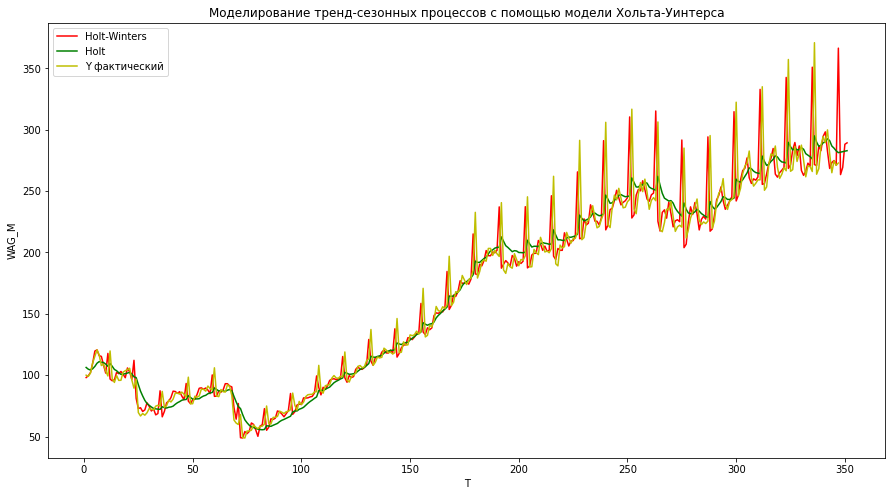

In [ ]:
plt.figure(figsize = (15, 8))
plt.title('–ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ —Ç—Ä–µ–Ω–¥-—Å–µ–∑–æ–Ω–Ω—ã—Ö –ø—Ä–æ—Ü–µ—Å—Å–æ–≤ —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏ –•–æ–ª—å—Ç–∞-–£–∏–Ω—Ç–µ—Ä—Å–∞')
plt.plot(X, pred, label='Holt-Winters', color='r')
plt.plot(X, pred1, label='Holt', color='g')
plt.plot(x, y, label='Y —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–π', color='y')
plt.xlabel('T')
plt.ylabel('WAG_M')
plt.legend(loc='best')
plt.show()

In [ ]:
model1 = Holt(y).fit()
pred1 = model1.predict(start=x[0], end=list(x.values)[-1]+T_preds)

In [ ]:
pred1

1      106.290043
2      104.851992
3      104.183861
4      105.229075
5      107.147658
          ...    
347    281.370338
348    281.770888
349    282.171438
350    282.571988
351    282.972539
Length: 351, dtype: float64

#### –ë—Ä–∞—É–Ω

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.regression.linear_model import OLS
from scipy.stats import t
import statsmodels.api as sm

In [ ]:
data = pd.read_excel('123.xlsx', sheet_name='2')
data.head()

T   WAG_M
0  1993 1  100.00
1       2   99.04
2       3  101.77
3       4  110.05
4       5  115.47

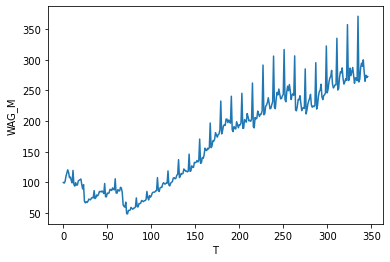

In [ ]:
plt.plot(data.WAG_M.values)
plt.xlabel('T')
plt.ylabel('WAG_M')
plt.show()

In [ ]:
data['t'] = [x for x in range(1, len(data)+1)]
data.head()

T   WAG_M  t
0  1993 1  100.00  1
1       2   99.04  2
2       3  101.77  3
3       4  110.05  4
4       5  115.47  5

In [ ]:
alpha, beta, k = 0.2, 0.8, 1
T_preds = 4 # –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å –Ω–∞ 4 –ø–µ—Ä–∏–æ–¥–∞ –≤–ø–µ—Ä—ë–¥

In [ ]:
x = data.t[:36]
y = data.WAG_M[:36]  # –≤–º–µ—Å—Ç–æ 36 –≤ –æ–±–∞ —Å–ª—É—á–∞—è –∑–∞–ø–∏—Ö–∞—Ç—å int(0.2*len(data))
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
results.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    116.540968
t         -1.263461
dtype: float64

In [ ]:
a0 = results.params[0]
a1 =results.params[1]
a0, a1

(116.54096825396815, -1.2634607464607466)

In [ ]:
y = data.WAG_M.values

In [ ]:
y_model, A0, A1, e = [], [], [], []
for i in range(len(y)):
  y_model.append(a0 + a1*k)
  e.append(y[i] - y_model[i])
  A0.append(a0 + a1 + (1 - beta)**2*e[i])
  A1.append(a1 + (1 - beta)**2*e[i])
  a0 = A0[-1]
  a1 = A1[-1]

In [ ]:
t_pred = [x for x in range(1, T_preds+1)]

point_pred = []
a0, a1 = A0[-1], A1[-1]
for i in range(T_preds):
  point_pred.append(a0+a1*t_pred[i])
point_pred

[283.84833653762, 282.12416095673336, 280.3999853758467, 278.67580979496006]

In [ ]:
t_a = t.isf(0.2/2, len(data)-2) * np.sqrt(len(data)-1) / np.sqrt(len(data) - 2 + t.isf(0.2/2, len(data)-2)**2)
Sy = np.var(y_model)**0.5
t_a, Sy

(1.2828082929613378, 76.6681718867237)

In [ ]:
U_k = []
t = [max(data.t.values) + x for x in range(1, T_preds+1)]
n = len(data)
for i in range(T_preds):
  U_k.append(t_a*Sy*(1 + 1/(n+t[i]) + 3*((n+t[i])+2*i-1)**2/((n+t[i])**3-(n+t[i])))**0.5)
U_k

[98.63257563809441, 98.63338659452309, 98.63419520982075, 98.63500147921606]

In [ ]:
t

[348, 349, 350, 351]

In [ ]:
pd.DataFrame({'y-': np.array(point_pred) - np.array(U_k),
              'y–ø—Ä–æ–≥': point_pred,
              'y+': np.array(point_pred) + np.array(U_k)})

y-       y–ø—Ä–æ–≥          y+
0  185.215761  283.848337  382.480912
1  183.490774  282.124161  380.757548
2  181.765790  280.399985  379.034181
3  180.040808  278.675810  377.310811

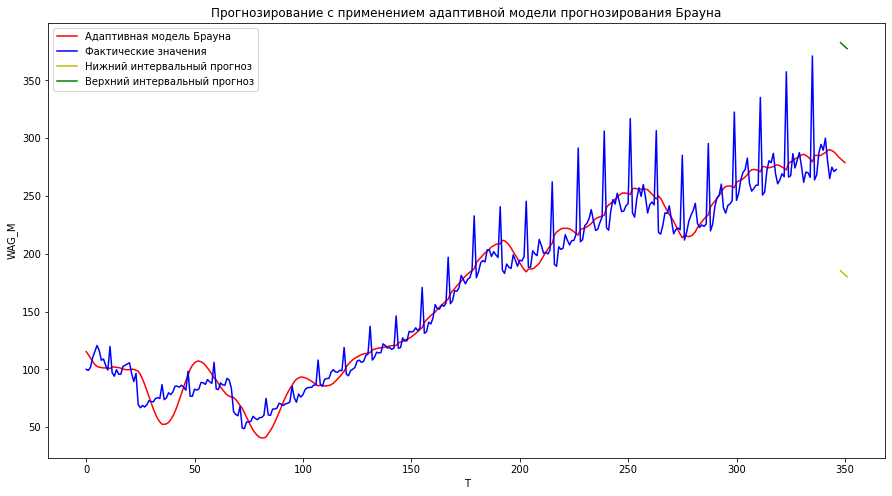

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(y_model+point_pred, color='r', label='–ê–¥–∞–ø—Ç–∏–≤–Ω–∞—è –º–æ–¥–µ–ª—å –ë—Ä–∞—É–Ω–∞')
plt.plot(data.WAG_M.values, color='b', label='–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.plot(t, np.array(point_pred) - np.array(U_k), color = 'y', label='–ù–∏–∂–Ω–∏–π –∏–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑')
plt.plot(t, np.array(point_pred) + np.array(U_k), color = 'g', label='–í–µ—Ä—Ö–Ω–∏–π –∏–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑')
plt.title('–ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Å –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ–º –∞–¥–∞–ø—Ç–∏–≤–Ω–æ–π –º–æ–¥–µ–ª–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –ë—Ä–∞—É–Ω–∞')
plt.xlabel('T')
plt.ylabel('WAG_M')
plt.legend()
plt.show()

#### –ú–µ—Ç–æ–¥ –§–æ—Å—Ç–µ—Ä–∞-–°—Ç—å—é–∞—Ä—Ç–∞

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [ ]:
data = pd.read_excel('123.xlsx', sheet_name='2')
data.head()

T   WAG_M
0  1993 1  100.00
1       2   99.04
2       3  101.77
3       4  110.05
4       5  115.47

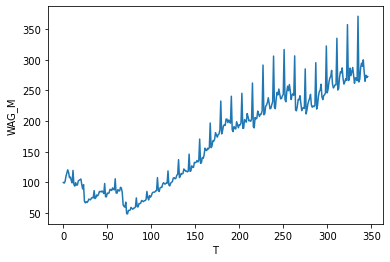

In [ ]:
plt.plot(data.WAG_M.values)
plt.xlabel('T')
plt.ylabel('WAG_M')
plt.show()

–¢—Ä–µ–Ω–¥, –∏–ª–∏ –æ—Å–Ω–æ–≤–Ω–∞—è —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è. f(t) - —ç—Ç–æ —É—Å—Ç–æ–π—á–∏–≤–∞—è –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å, –Ω–∞–±–ª—é–¥–∞–µ–º–∞—è –≤ —Ç–µ—á–µ–Ω–∏–µ –¥–ª–∏—Ç–µ–ª—å–Ω–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞ –≤—Ä–µ–º–µ–Ω–∏. (–î–ª–∏—Ç–µ–ª—å–Ω–∞—è, ‚Äú–≤–µ–∫–æ–≤–∞—è‚Äù –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å –∏–∑–º–µ–Ω–µ–Ω–∏—è —É—Ä–æ–≤–Ω–µ–π). –¢—Ä–µ–Ω–¥ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –æ–±—â–µ–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —Ä–∞–∑–≤–∏—Ç–∏—è —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–≥–æ –ø—Ä–æ—Ü–µ—Å—Å–∞.

In [ ]:
y = data.WAG_M.values
y

array([100.  ,  99.04, 101.77, 110.05, 115.47, 120.65, 116.38, 107.85,
       108.93, 103.39,  99.35, 119.75,  97.  ,  94.09,  99.74,  95.75,
        95.84, 102.55, 103.58, 104.61, 105.66,  96.15,  89.42,  96.57,
        69.53,  66.75,  68.75,  67.38,  69.4 ,  72.87,  72.14,  71.85,
        74.73,  75.47,  74.79,  86.76,  73.75,  75.22,  79.74,  78.14,
        80.48,  85.39,  85.39,  84.54,  86.23,  84.51,  81.97,  98.37,
        76.73,  76.73,  82.86,  82.03,  83.02,  88.66,  88.4 ,  86.98,
        91.16,  89.15,  87.91, 106.01,  83.01,  82.51,  88.29,  86.52,
        86.26,  92.21,  90.74,  83.48,  63.44,  60.97,  59.81,  67.89,
        49.22,  48.77,  54.48,  54.48,  55.13,  59.38,  57.54,  56.45,
        58.2 ,  58.43,  60.18,  74.87,  60.57,  60.2 ,  65.56,  65.69,
        66.41,  70.67,  69.82,  68.77,  70.21,  70.57,  71.91,  85.42,
        75.43,  71.58,  78.6 ,  76.  ,  78.06,  82.51,  84.07,  84.33,
        84.41,  86.27,  86.61, 108.  ,  87.16,  85.33,  91.39,  92.03,
      

In [ ]:
k_t, l_t = [], []
for i in range(1, len(y)):
  if y[i] > max(y[:i]):
    k_t.append(1)
  if y[i] < max(y[:i]):
    k_t.append(0)
  if y[i] < min(y[:i]):
    l_t.append(1)
  if y[i] > min(y[:i]):
    l_t.append(0)
k_t = np.array(k_t)
l_t = np.array(l_t)

In [ ]:
s = sum(k_t + l_t)
d = sum(k_t - l_t)
s, d

(30, 8)

In [ ]:
len(data)

347

In [ ]:
sigma1 = (2*np.log(len(data))-3.4253)**0.5
sigma2 = (2*np.log(len(data))-0.8456)**0.5
mu = (1.693872*np.log(len(data)) - 0.299015)/(1 - 0.035092*np.log(len(data)) + 0.002705*(np.log(len(data))**2))
ts = abs(s - mu)/sigma1
td = abs(d - 0)/sigma2
ts, td

(6.664835938667151, 2.42836572202624)

In [ ]:
tcrit = t.isf(0.05/2, len(data)-2) * np.sqrt(len(data)-1) / np.sqrt(len(data) - 2 + t.isf(0.05/2, len(data)-2)**2)
tcrit

1.958760999687843

d=o –º–æ–∂–µ—Ç –±—ã—Ç—å –∏ —Ç–æ–≥–¥–∞, –∫–æ–≥–¥–∞ —Ä—è–¥ –æ—Ö–≤–∞—Ç—ã–≤–∞–µ—Ç –¥–≤–∞ –ø–µ¬≠—Ä–∏–æ–¥–∞ —Å –ø—Ä–æ—Ç–∏–≤–æ–ø–æ–ª–æ–∂–Ω—ã–º–∏ —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è–º–∏. –ö—Ä–æ–º–µ —Ç–æ–≥–æ, d = 0 –∏ –≤ —Å–ª—É—á–∞–µ, –∫–æ–≥–¥–∞ –ø–æ–¥—ä–µ–º—ã –∏ –ø–∞–¥–µ–Ω–∏—è —É—Ä–æ–≤–Ω–µ–π —á–µ—Ä–µ–¥—É—é—Ç—Å—è. –ï—Å–ª–∏ —É—Ä–æ–≤–Ω–∏ —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ —Ä–∞—Å–ø–æ–ª–∞–≥–∞—é—Ç—Å—è –≤–æ–∫—Ä—É–≥ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–æ–π –ª–∏–Ω–∏–∏, —Ç–æ –≤–µ–ª–∏—á–∏–Ω–∞ d = 0 –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—é —Ç—Ä–µ–Ω–¥–∞ –≤ —Å—Ä–µ–¥–Ω–µ–π. –û–¥–Ω–∞–∫–æ –ø—Ä–∏ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ d –Ω–µ –ø—Ä–∏–Ω–∏–º–∞—é—Ç—Å—è –≤–æ –≤–Ω–∏–º–∞¬≠–Ω–∏–µ –≤–µ–ª–∏—á–∏–Ω—ã –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π –æ—Ç –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–æ–π –ª–∏–Ω–∏–∏. –ü–æ—ç—Ç–æ–º—É –º—ã—Å¬≠–ª–∏–º–∞ —Ç–∞–∫–∞—è —Å–∏—Ç—É–∞—Ü–∏—è, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–π –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è —Å –æ–¥–Ω–∏–º –∑–Ω–∞–∫–æ–º –±—É¬≠–¥—É—Ç —Å–∏—Å—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏ –≤—ã—à–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π —Å –¥—Ä—É–≥–∏–º –∑–Ω–∞–∫–æ–º. –í —ç—Ç–æ–º —Å–ª—É—á–∞–µ —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è —Å—Ä–µ–¥–Ω–µ–π –∫ —Ä–æ—Å—Ç—É (–ø–∞–¥–µ–Ω–∏—é) –Ω–µ –æ—Ç—Ä–∞–∑–∏—Ç—Å—è –Ω–∞ –≤–µ¬≠–ª–∏—á–∏–Ω–µ d.
..–û–Ω –ø–æ–∑–≤–æ–ª—è–µ—Ç —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –∫—Ä–æ–º–µ —Ç—Ä–µ–Ω–¥–∞ —Å–∞–º–æ–≥–æ —Ä—è–¥–∞ –µ—â–µ –∏ —Ç—Ä–µ–Ω–¥ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.


In [ ]:
if tcrit > ts and tcrit > td:
  print('–¢—Ä–µ–Ω–¥ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç')
if tcrit < ts and tcrit > td:
  print('–¢—Ä–µ–Ω–¥ —Ä—è–¥–∞ –µ—Å—Ç—å, –∞ —Ç—Ä–µ–Ω–¥–∞ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –Ω–µ—Ç')
if tcrit > ts and tcrit < td:
  print('–¢—Ä–µ–Ω–¥–∞ —Ä—è–¥–∞ –Ω–µ—Ç, –∞ —Ç—Ä–µ–Ω–¥ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –µ—Å—Ç—å')
if tcrit < ts and tcrit < td:
  print('–ï—Å—Ç—å —Ç—Ä–µ–Ω–¥ —Ä—è–¥–∞ –∏ —Ç—Ä–µ–Ω–¥ –¥–∏—Å–ø–µ—Ä—Å–∏–∏')

–ï—Å—Ç—å —Ç—Ä–µ–Ω–¥ —Ä—è–¥–∞ –∏ —Ç—Ä–µ–Ω–¥ –¥–∏—Å–ø–µ—Ä—Å–∏–∏


#### –ú–µ—Ç–æ–¥ –ø—Ä–æ–≤–µ—Ä–∫–∏ —Ä–∞–∑–Ω–æ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–∏—Ö —É—Ä–æ–≤–Ω–µ–π

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f, t
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('123.xlsx', sheet_name='2')
data.head()

T   WAG_M
0  1993 1  100.00
1       2   99.04
2       3  101.77
3       4  110.05
4       5  115.47

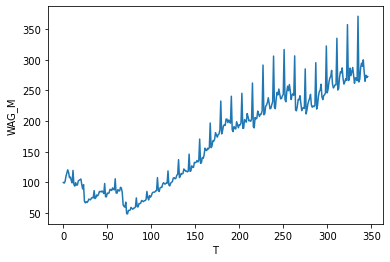

In [ ]:
plt.plot(data.WAG_M.values)
plt.xlabel('T')
plt.ylabel('WAG_M')
plt.show()

–¢—Ä–µ–Ω–¥, –∏–ª–∏ –æ—Å–Ω–æ–≤–Ω–∞—è —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è. f(t) - —ç—Ç–æ —É—Å—Ç–æ–π—á–∏–≤–∞—è –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å, –Ω–∞–±–ª—é–¥–∞–µ–º–∞—è –≤ —Ç–µ—á–µ–Ω–∏–µ –¥–ª–∏—Ç–µ–ª—å–Ω–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞ –≤—Ä–µ–º–µ–Ω–∏. (–î–ª–∏—Ç–µ–ª—å–Ω–∞—è, ‚Äú–≤–µ–∫–æ–≤–∞—è‚Äù –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å –∏–∑–º–µ–Ω–µ–Ω–∏—è —É—Ä–æ–≤–Ω–µ–π). –¢—Ä–µ–Ω–¥ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –æ–±—â–µ–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —Ä–∞–∑–≤–∏—Ç–∏—è —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–≥–æ –ø—Ä–æ—Ü–µ—Å—Å–∞.


In [ ]:
dt1 = data.WAG_M.iloc[:int(round(len(data)/2, 0))]
dt2 = data.WAG_M.iloc[int(round(len(data)/2, 0)):]
# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞–∑–±–∏–µ–Ω–∏—è
len(dt1), len(dt2), len(dt1)+len(dt2), len(data)

(174, 173, 347, 347)

In [ ]:
y1_mean = dt1.values.mean()
y2_mean = dt2.values.mean()
y1_mean, y2_mean

(98.31959770114943, 237.56364161849712)

In [ ]:
Var1 = sum((dt1.values - y1_mean)**2)/(len(dt1)-1)
Var2 = sum((dt2.values - y2_mean)**2)/(len(dt2)-1)
Var1, Var2

(856.7056004152547, 1323.9321965452345)

–ü—Ä–∏–º–µ–Ω–∏–º —Ç–æ–ª—å–∫–æ –¥–ª—è —Ä—è–¥–æ–≤ —Å –º–æ–Ω–æ—Ç–æ–Ω–Ω–æ–π —Ç–µ–Ω–¥–µ–Ω—Ü–∏–µ–π. –ï—Å–ª–∏ –∂–µ —Ä—è–¥ –º–µ–Ω—è–µ—Ç –æ–±—â–µ–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —Ä–∞–∑–≤–∏—Ç–∏—è, —Ç–æ —Ç–æ—á–∫–∞ –ø–æ–≤–æ—Ä–æ—Ç–∞ —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏ –º–æ–∂–µ—Ç –æ–∫–∞¬≠–∑–∞—Ç—å—Å—è –±–ª–∏–∑–∫–æ–π –∫ —Å–µ—Ä–µ–¥–∏–Ω–µ —Ä—è–¥–∞, –≤ —Å–∏–ª—É —ç—Ç–æ–≥–æ —Å—Ä–µ–¥–Ω–∏–µ –¥–≤—É—Ö –æ—Ç—Ä–µ–∑¬≠–∫–æ–≤ —Ä—è–¥–∞ –±—É–¥—É—Ç –±–ª–∏–∑–∫–∏ –∏ –ø—Ä–æ–≤–µ—Ä–∫–∞ –º–æ–∂–µ—Ç –Ω–µ –ø–æ–∫–∞–∑–∞—Ç—å –Ω–∞–ª–∏—á–∏–µ —Ç—Ä–µ–Ω–¥–∞.



In [ ]:
if Var1 > Var2:
  F = Var1/Var2
elif Var1 < Var2:
  F = Var2/Var1
print(F)

1.5453759096514719


In [ ]:
Fcrit = f.isf(0.05, len(dt1), len(dt2))

if F > Fcrit:
  print('F > F–∫—Ä, –≥–∏–ø–æ—Ç–µ–∑–∞ –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ –¥–∏—Å–ø–µ—Ä—Å–∏–π –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è –∏ –¥–µ–ª–∞–µ—Ç—Å—è –≤—ã–≤–æ–¥,\
  \n —á—Ç–æ –¥–∞–Ω–Ω—ã–π –º–µ—Ç–æ–¥ –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞–ª–∏—á–∏—è —Ç—Ä–µ–Ω–¥–∞ –æ—Ç–≤–µ—Ç–∞ –Ω–µ –¥–∞–µ—Ç.')
if F < Fcrit:
  print('F < F–∫—Ä => –ø–µ—Ä–µ—Ö–æ–¥–∏–º –∫ 4 —à–∞–≥—É')

F > F–∫—Ä, –≥–∏–ø–æ—Ç–µ–∑–∞ –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ –¥–∏—Å–ø–µ—Ä—Å–∏–π –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è –∏ –¥–µ–ª–∞–µ—Ç—Å—è –≤—ã–≤–æ–¥,  
 —á—Ç–æ –¥–∞–Ω–Ω—ã–π –º–µ—Ç–æ–¥ –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞–ª–∏—á–∏—è —Ç—Ä–µ–Ω–¥–∞ –æ—Ç–≤–µ—Ç–∞ –Ω–µ –¥–∞–µ—Ç.


In [ ]:
# 4 –®–∞–≥, –µ—Å–ª–∏ –ø—Ä–µ–¥—ã–¥—É—â–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞ —Ç—Ä–µ–±—É–µ—Ç —ç—Ç–æ–≥–æ!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# sigma = (((len(dt1) - 1)*Var1 + (len(dt2) - 1)*Var2)/(len(dt1) + len(dt2) - 2))**0.5
# t_ = abs(y1_mean - y2_mean)/(sigma*(1/len(dt1) + 1/len(dt2)))

# tcrit = t.isf(0.05/2, len(data)-2) * np.sqrt(len(data)-1) / np.sqrt(len(data) - 2 + t.isf(0.05/2, len(data)-2)**2)

# if t_ < tcrit:
#   print('t < t–∫—Ä, –≥–∏–ø–æ—Ç–µ–∑–∞ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç—Å—è, —Ç.–µ. —Ç—Ä–µ–Ω–¥–∞ –Ω–µ—Ç.')
# elif t_ > tcrit:
#   print('t > t–∫—Ä, –≥–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è, —Ç.–µ. —Ç—Ä–µ–Ω–¥ –µ—Å—Ç—å.')


–ï—Å–ª–∏ —Ä–∞—Å—á–µ—Ç–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ ùêπ –º–µ–Ω—å—à–µ —Ç–∞–±–ª–∏—á–Ω–æ–≥–æ ùêπ–∫—Ä , —Ç–æ –≥–∏–ø–æ—Ç–µ–∑–∞ –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ –¥–∏—Å–ø–µ—Ä—Å–∏–π –ø—Ä–∏–Ω–∏–º–∞–µ—Ç—Å—è –∏ –ø–µ—Ä–µ—Ö–æ–¥—è—Ç –∫ —á–µ—Ç–≤–µ—Ä—Ç–æ–º—É —ç—Ç–∞–ø—É. –ï—Å–ª–∏ ùêπ –±–æ–ª—å—à–µ –∏–ª–∏ —Ä–∞–≤–Ω–æ ùêπ–∫—Ä , –≥–∏–ø–æ—Ç–µ–∑–∞ –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ –¥–∏—Å–ø–µ—Ä—Å–∏–π –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è –∏ –¥–µ–ª–∞–µ—Ç—Å—è –≤—ã–≤–æ–¥, —á—Ç–æ –¥–∞–Ω–Ω—ã–π –º–µ—Ç–æ–¥ –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞–ª–∏—á–∏—è —Ç—Ä–µ–Ω–¥–∞ –æ—Ç–≤–µ—Ç–∞ –Ω–µ –¥–∞–µ—Ç.

#### –ö—Ä–∏—Ç–µ—Ä–∏–π —Å–µ—Ä–∏–π, –æ—Å–Ω–æ–≤–∞–Ω–Ω—ã–π –Ω–∞ –º–µ–¥–∏–∞–Ω–µ

In [ ]:
import pandas as pd
from statistics import median
from math import log10
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('123.xlsx', sheet_name='2')
data.head()

T   WAG_M
0  1993 1  100.00
1       2   99.04
2       3  101.77
3       4  110.05
4       5  115.47

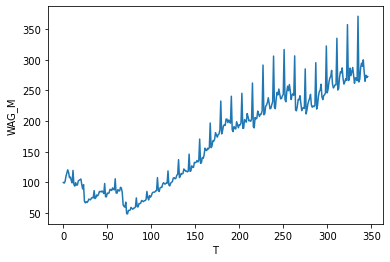

In [ ]:
plt.plot(data.WAG_M.values)
plt.xlabel('T')
plt.ylabel('WAG_M')
plt.show()

In [ ]:
data['rang'] = data.WAG_M.sort_values().values
data

T   WAG_M    rang
0    1993 1  100.00   48.77
1         2   99.04   49.22
2         3  101.77   54.48
3         4  110.05   54.48
4         5  115.47   55.13
..      ...     ...     ...
342       7  280.40  316.80
343       8  265.00  322.50
344       9  274.80  335.10
345      10  271.00  357.30
346      11  272.90  371.00

[347 rows x 3 columns]

–¢—Ä–µ–Ω–¥, –∏–ª–∏ –æ—Å–Ω–æ–≤–Ω–∞—è —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è. f(t) - —ç—Ç–æ —É—Å—Ç–æ–π—á–∏–≤–∞—è –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å, –Ω–∞–±–ª—é–¥–∞–µ–º–∞—è –≤ —Ç–µ—á–µ–Ω–∏–µ –¥–ª–∏—Ç–µ–ª—å–Ω–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞ –≤—Ä–µ–º–µ–Ω–∏. (–î–ª–∏—Ç–µ–ª—å–Ω–∞—è, ‚Äú–≤–µ–∫–æ–≤–∞—è‚Äù –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å –∏–∑–º–µ–Ω–µ–Ω–∏—è —É—Ä–æ–≤–Ω–µ–π). –¢—Ä–µ–Ω–¥ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –æ–±—â–µ–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —Ä–∞–∑–≤–∏—Ç–∏—è —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–≥–æ –ø—Ä–æ—Ü–µ—Å—Å–∞.

–ö—Ä–∏—Ç–µ—Ä–∏–π —Å–µ—Ä–∏–π, –æ—Å–Ω–æ–≤–∞–Ω–Ω—ã–π –Ω–∞ –º–µ–¥–∏–∞–Ω–µ, —É–ª–∞–≤–ª–∏–≤–∞–µ—Ç —Ç–æ–ª—å–∫–æ –º–æ–Ω–æ—Ç–æ–Ω–Ω–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–≥–æ (–æ—Ü–µ–Ω–∫–∏ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –æ–∂–∏–¥–∞–Ω–∏—è).

In [ ]:
Me = median(data.rang.values)
Me

177.65

In [ ]:
data['delta_i'] = data.WAG_M > Me
ser = data.delta_i.values
ser

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
v = list()
L = 1
for i in range(len(ser)-1):
  if ser[i] == ser[i+1]:
    L += 1
  else:
    v.append(L)
    L = 1
v.append(L)
v_n = len(v)
tau = max(v)

In [ ]:
v_n, tau

(6, 171)

In [ ]:
n = len(data.WAG_M)
first = 3.3*(log10(n)+ 1)
second = 1/2*(n+1-1.96*(n-1)**0.5)

In [ ]:
pd.DataFrame({'Params': ['tau_max', 'v'], 'Score':[tau, v_n],
              'Statistic':[first, second]})

Params  Score   Statistic
0  tau_max    171   11.683087
1        v      6  155.770946

In [ ]:
# –ï—Å–ª–∏ tau_max (Score) < —Ä–∞—Å—Å—á—ë—Ç–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è (Statistic)
# –∏ v (Score) > —Ä–∞—Å—Å—á—ë—Ç–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è (Statistic),
# —Ç–æ–≥–¥–∞ –º–æ–∂–Ω–æ –≥–æ–≤–æ—Ä–∏—Ç—å –æ —Ç–æ–º, —á—Ç–æ —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏ (—Ç—Ä–µ–Ω–¥–Ω–∞) –Ω–µ—Ç.
# –í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ –æ–±–∞ –Ω–µ—Ä–∞–≤–µ–Ω—Å—Ç–≤–∞ –Ω–µ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, —Ç—Ä–µ–Ω–¥ –µ—Å—Ç—å.

if tau > first and v_n < second:
  print('–û–±–∞ –∏–∑ –Ω–µ—Ä–∞–≤–µ–Ω—Å—Ç–≤–∞ –Ω–∞—Ä—É—à–∞—é—Ç—Å—è, —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è (—Ç—Ä–µ–Ω–¥) –µ—Å—Ç—å.')
else:
  print('–¢—Ä–Ω–¥–∞ –Ω–µ—Ç')

–û–±–∞ –∏–∑ –Ω–µ—Ä–∞–≤–µ–Ω—Å—Ç–≤–∞ –Ω–∞—Ä—É—à–∞—é—Ç—Å—è, —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è (—Ç—Ä–µ–Ω–¥) –µ—Å—Ç—å.


#### –•–∏–ª–¥—Ä–µ—Ç–∞-–õ—É

In [ ]:
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS

In [ ]:
data = pd.read_excel('123.xlsx', sheet_name='1', header=None, names=['y', 'X'])
data.head()

y      X
0  0.548  2.158
1  0.663  1.573
2  1.115  0.982
3  1.428  0.982
4  0.924  0.948

In [ ]:
rho = [-0.99, -0.5, 0, 0.5, 0.99]
ESS, a_hat, b_hat, res, residuals = [], [], [], [], []

In [ ]:
for r in rho:
  yt1 = data.y[:-1].values
  yt = data.y[1:].values
  ynew = yt-yt1*r

  Xt1 = data.X[:-1].values
  Xt = data.X[1:].values
  Xnew = Xt-Xt1*r

  Xnew1 = sm.add_constant(Xnew)
  model = sm.OLS(ynew, Xnew1)
  results = model.fit()
  res.append(results)

  a = results.params[0]
  b = results.params[1]

  a_hat.append(a/(1-r))
  b_hat.append(b)

  y_pred = a + b*Xnew
  residuals.append(list(ynew-y_pred))
  ESS.append(sum((ynew-y_pred)**2))

  i = ESS.index(min(ESS))

print(f'Y^_t = {a_hat[i]} + {b_hat[i]}*X_t + {rho[i]}*e_(t-1)')

Y^_t = 2.3989781708720384 + -0.8330193546814517*X_t + 0.5*e_(t-1)


–ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏.

1. –ó–Ω–∞—á–µ–Ω–∏—è rho –≤—ã–±–∏—Ä–∞—é—Ç—Å—è –∏–∑ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ (-1;1) —Å –Ω–µ–∫–æ—Ç–æ—Ä—ã–º —à–∞–≥–æ–º.

2. –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è rho –≤—ã–ø–æ–ª–Ω—è—é—Ç—Å—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è: $\widetilde{y_t} = y_t - \rho\cdot y_{t-1}$ –∏ $\widetilde{x_t} = x_t - \rho\cdot x_{t-1}$
–û–ø—Ä–µ–¥–µ–ª—è—é—Ç—Å—è –ú–ù–ö-–æ—Ü–µ–Ω–∫–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
3. –°—Ç—Ä–æ–∏—Ç—Å—è –≤–µ–∫—Ç–æ—Ä –æ—Å—Ç–∞—Ç–∫–æ–≤
4. –í –∫–∞—á–µ—Å—Ç–≤–µ rho –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è —Ç–æ –µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏–µ, –¥–ª—è –∫–æ—Ç–æ—Ä–æ–≥–æ —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –æ—Å—Ç–∞—Ç–∫–æ–≤ –º–∏–Ω–∏–º–∞–ª—å–Ω–∞.
5. –í –Ω–µ–∫–æ—Ç–æ—Ä–æ–π –æ–∫—Ä–µ—Å—Ç–Ω–æ—Å—Ç–∏ –ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ rho —É—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç—Å—è –±–æ–ª–µ–µ –º—è–≥–∫–∞—è —Å–µ—Ç–∫–∞, –∏ –ø—Ä–æ—Ü–µ—Å—Å –ø–æ–≤—Ç–æ—Ä—è–µ—Ç—Å—è –¥–æ —Ç–µ—Ö –ø–æ—Ä, –ø–æ–∫–∞ –Ω–µ –±—É–¥–µ—Ç –¥–æ—Å—Ç–∏–≥–Ω—É—Ç–∞ —Ç—Ä–µ–±—É–µ–º–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å.


In [ ]:
print(res[i].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     82.54
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.01e-08
Time:                        12:39:29   Log-Likelihood:                 2.0402
No. Observations:                  23   AIC:                          -0.08049
Df Residuals:                      21   BIC:                             2.190
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1995      0.084     14.269      0.0

In [ ]:
# –°–ø–µ—Ü–∏—Ñ–∏–∫–∞—Ü–∏—è –∏–º–µ–µ—Ç –≤–∏–¥:
# Y^_t = 2.3989781708720384 + -0.8330193546814517*X_t + 0.5*e_(t-1)
#         (0,084)                (0,092)

In [ ]:
# –ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç —Ç.–∫. DW –ø–æ–ø–∞–¥–∞–µ—Ç –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª –æ—Ç du –¥–æ 4-du
# du = 1.45
# dl = 1.27

durbin_watson(residuals[i])

2.241106646110425

In [ ]:
pd.DataFrame({'ESS':ESS, 'a_–æ—Ü':a_hat, 'b_–æ—Ü':b_hat, 'rho':rho})

ESS      a_–æ—Ü      b_–æ—Ü   rho
0  3.742247  2.085791 -0.646292 -0.99
1  2.280869  2.141910 -0.679774 -0.50
2  1.406614  2.288088 -0.769644  0.00
3  1.127727  2.398978 -0.833019  0.50
4  1.495875  3.604796 -0.841058  0.99

#### –ú–µ—Ç–æ–¥ –ß–µ—Ç–≤–µ—Ä–∏–∫–æ–≤–∞

In [ ]:
cd /content/drive/MyDrive/–í–£–ó/–≠–∫–æ–Ω–æ–º–µ—Ç—Ä–∏–∫–∞

/content/drive/MyDrive/–í–£–ó/–≠–∫–æ–Ω–æ–º–µ—Ç—Ä–∏–∫–∞


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('data_season.xlsx', dtype={'t':int})
data

t  BBR_EA_M_I
0     1       100.0
1     2        98.6
2     3       109.3
3     4       111.6
4     5       109.6
..   ..         ...
155  12       199.0
156   1       138.9
157   2       142.9
158   3       161.8
159   4       154.0

[160 rows x 2 columns]

In [ ]:
year = []
for y in range(14):
    for j in range(12):
        year.append(y)
len(year)

168

In [ ]:
year = year[:160]
len(year)

160

In [ ]:
year[-1]

13

In [ ]:
data['Year'] = year

In [ ]:
Y_ = data['BBR_EA_M_I']
Y = [np.nan]*6
# —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –ø–æ —Å—Ä–µ–¥–Ω–µ—Ö—Ä–æ–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π
for t in range(6, len(data)-6):
    Y.append((Y_[t-6]/2 + Y_[t+6]/2 + sum(Y_[t-5:t+6]))/12)
for i in range(6):
    Y.append(np.nan)

In [ ]:
data['Y'] = Y

In [ ]:
data = data.dropna()

In [ ]:
data

t  BBR_EA_M_I  Year           Y
6     7       120.6     0  117.358333
7     8       124.2     0  118.237500
8     9       130.2     0  119.183333
9    10       130.8     0  120.079167
10   11       123.1     0  120.966667
..   ..         ...   ...         ...
149   6       161.6    12  168.641667
150   7       169.4    12  168.066667
151   8       172.9    12  167.879167
152   9       187.3    12  167.875000
153  10       188.2    12  167.808333

[148 rows x 4 columns]

In [ ]:
l1 = [] # –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è
for index, row in data.iterrows():
    l1.append(row['BBR_EA_M_I'] - row['Y'])

In [ ]:
data['l1'] = l1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sigma1 = [] # —Å–∫–æ
for y in range(13):
    d = data[data['Year']==y]
    d = d['l1']
    T = 12 #len(d)
    s = (sum(q**2 for q in d) - sum(d)**2/T)/(T-1)
    sigma1.append(np.sqrt(abs(s)))

In [ ]:
l1_norm = [] # –Ω–æ—Ä–º–∏—Ä–æ–≤–∫–∞ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π
for y in range(13):
    d = data[data['Year']==y]
    d = d['l1']
    for s in d:
        l1_norm.append(s/sigma1[y])

In [ ]:
data['l1_norm'] = l1_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
V1 = [] # —Å–µ–∑–æ–Ω–Ω–∞—è –≤–æ–ª–Ω–∞
for m in range(1, 13):
    d = data[data['t']==m]
    d = d['l1_norm']
    V1.append(sum(d)/12)

In [ ]:
U1 = [] # –ø–µ—Ä–≤–∞—è –æ—Ü–µ–Ω–∫–∞ —Ç—Ä–µ–Ω–¥–∞
for index, row in data.iterrows():
    v = row['t']-1
    s = row['Year']
    U1.append(row['Y'] - v*s)

In [ ]:
data['U1'] = U1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
U2 = [(5*U1[0] + 2*U1[1] - U1[2])/6]
for t in range(1, len(data)-1):
    U2.append(sum(U1[t-2:t+2])/5)
U2.append((5*U1[-1] + 2*U1[-2] - U1[-3])/6)
# –Ω–æ–≤–∞—è –æ—Ü–µ–Ω–∫–∞ —Ç—Ä–µ–Ω–¥–∞

In [ ]:
data['U2'] = U2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
l2 = [] # –Ω–æ–≤—ã–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è
for index, row in data.iterrows():
    l2.append(row['BBR_EA_M_I'] - row['U2'])

In [ ]:
data['l2'] = l2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sigma2 = [] # —Å–∫–æ
for y in range(13):
    d = data[data['Year']==y]
    d = d['l2']
    T = len(d)
    s = (sum(q**2 for q in d) - sum(d)**2/T) / (T-1)
    sigma2.append(np.sqrt(abs(s)))

In [ ]:
l2_norm = []
for y in range(13):
    d = data[data['Year']==y]
    d = d['l2']
    for s in d:
        l2_norm.append(s/sigma2[y])

In [ ]:
data['l2_norm'] = l2_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
V2 = [] # —Å–µ–∑–æ–Ω–Ω–∞—è –≤–æ–ª–Ω–∞
for m in range(1, 13):
    d = data[data['t']==m]
    d = d['l2_norm']
    V2.append(sum(d)/12)

In [ ]:
e = [] # –æ—Å—Ç–∞—Ç–æ—á–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞
for index, row in data.iterrows():
    v = row['t']-1
    s = row['Year']
    e.append(row['l2'] - v*s)

In [ ]:
data['e'] = e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
k = [] # –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –Ω–∞–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏ —Å–µ–∑–æ–Ω–Ω–æ–π –≤–æ–ª–Ω—ã
for y in range(13):
    d = data[data['Year']==y]
    l = d['l2']
    T = len(l)
    ei = d['e']
    k.append(sum(l*ei)/sum(j**2 for j in ei))

In [ ]:
import matplotlib.pyplot as plt

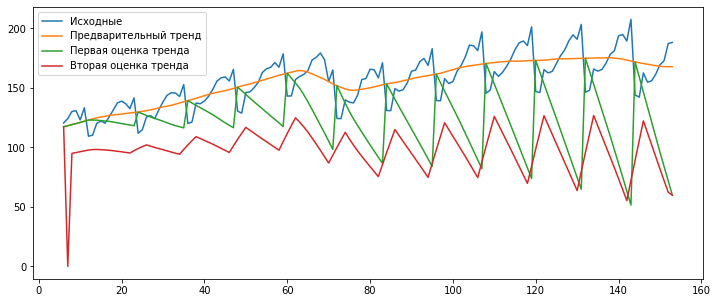

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(data['BBR_EA_M_I'], label='–ò—Å—Ö–æ–¥–Ω—ã–µ')
plt.plot(data['Y'], label='–ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—ã–π —Ç—Ä–µ–Ω–¥')
plt.plot(data['U1'], label='–ü–µ—Ä–≤–∞—è –æ—Ü–µ–Ω–∫–∞ —Ç—Ä–µ–Ω–¥–∞')
plt.plot(data['U2'], label='–í—Ç–æ—Ä–∞—è –æ—Ü–µ–Ω–∫–∞ —Ç—Ä–µ–Ω–¥–∞')
plt.legend()

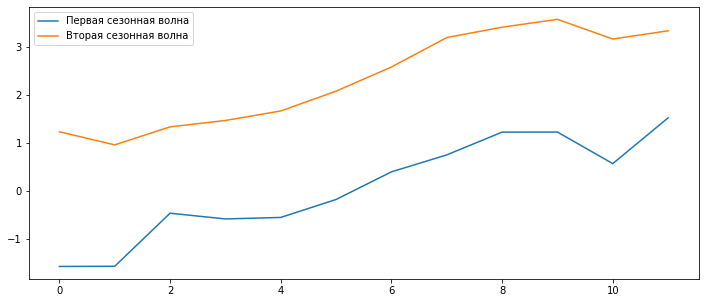

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(V1, label='–ü–µ—Ä–≤–∞—è —Å–µ–∑–æ–Ω–Ω–∞—è –≤–æ–ª–Ω–∞')
plt.plot(V2, label='–í—Ç–æ—Ä–∞—è —Å–µ–∑–æ–Ω–Ω–∞—è –≤–æ–ª–Ω–∞')
plt.legend()

Text(0.5, 1.0, '–û—Å—Ç–∞—Ç–æ—á–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞')

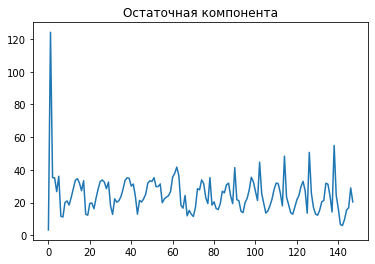

In [ ]:
plt.plot(e)
plt.title('–û—Å—Ç–∞—Ç–æ—á–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞')